In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import time
import copy
import os


c:\Users\Chiara Falcone_2\anaconda3\envs\MLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import os

# Specifica il percorso della cartella principale
cartella_principale = 'C:\\Users\\Chiara Falcone_2\\Desktop\\Computer Vision\\Progetto\\dataset\\test'

# Crea una lista per memorizzare i dati
data = []

# Cammina attraverso la cartella principale e tutte le sue sottocartelle
for root, dirs, files in os.walk(cartella_principale):
    for file in files:
        if file.endswith('.jpg'):
            # Ottieni il percorso completo del file
            percorso_completo = os.path.join(root, file)
            # Ottieni il nome della cartella (root)
            nome_cartella = os.path.basename(root)
            # Aggiungi i dati alla lista
            data.append({'filename': file, 'class': nome_cartella})

# Crea un dataframe a partire dalla lista di dizionari

df = pd.DataFrame(data)
df['alias'] = df.index.to_series().apply(lambda x: f"alias_{x}")
# Mostra il dataframe
print(df)


                       filename     class        alias
0      generated_image_7251.jpg  fake_sg3      alias_0
1      generated_image_7252.jpg  fake_sg3      alias_1
2      generated_image_7253.jpg  fake_sg3      alias_2
3      generated_image_7254.jpg  fake_sg3      alias_3
4      generated_image_7255.jpg  fake_sg3      alias_4
...                         ...       ...          ...
11098                 29995.jpg      real  alias_11098
11099                 29996.jpg      real  alias_11099
11100                 29997.jpg      real  alias_11100
11101                 29998.jpg      real  alias_11101
11102                 29999.jpg      real  alias_11102

[11103 rows x 3 columns]


In [3]:
model = torch.load('C:\\Users\\Chiara Falcone_2\\Desktop\\Computer Vision\\Progetto\\deepfake-generator\\DeepFake_Detection\\df_model.pt')

In [4]:
Y_real = []

for c in df['class']:
    Y_real.append(c)

print(Y_real)

['fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fake_sg3', 'fa

In [5]:
from PIL import Image
transform = transforms.Compose([
    transforms.ToTensor()
])
use_cuda = torch.cuda.is_available()

device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
# Inizializza il modello (assumendo che il modello sia definito da qualche parte nel codice)
# model = ... (inizializza il tuo modello qui)

# Verifica se CUDA è disponibile e imposta il dispositivo appropriato
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model.to(device)

# Lista per memorizzare le predizioni
Y_pred = []
class_names =['fake_sg3', 'fake_ug', 'real']

# Cammina attraverso la cartella principale e tutte le sue sottocartelle per eseguire le predizioni
for root, dirs, files in os.walk(cartella_principale):
    for file in files:
        if file.endswith('.jpg'):
            # Carica l'immagine
            file_path = os.path.join(root, file)
            image = Image.open(file_path).convert('RGB')
            image = transform(image)
            image = image.unsqueeze(0)  # Aggiunge una dimensione batch
            image = image.to(device)

            # Esegui la predizione
            outputs = model(image)
            _, predicted = torch.max(outputs, 1)
            class_index = predicted.item()

            # Stampa la classe predetta
            class_name = class_names[class_index]
            Y_pred.append(class_name)

            print(f"File: {file} -> Classe predetta: {class_name} (Indice: {class_index})")


print(f"Numero totale di predizioni: {len(Y_pred)}")

File: generated_image_7251.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7252.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7253.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7254.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7255.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7256.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7257.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7258.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7259.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_726.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7260.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7261.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7262.jpg -> Classe predetta: fake_sg3 (Indice: 0)
File: generated_image_7263.jpg -> Classe predetta: fake_sg3 (Indi

In [7]:
import sklearn
from sklearn.metrics import confusion_matrix
Y_pred = np.array(Y_pred)
Y_real = np.array(Y_real)
print(len(Y_real) ,len(Y_pred))
print(Y_pred)
sklearn.metrics.confusion_matrix(Y_real, Y_pred,labels=None, sample_weight=None, normalize=None)



11103 11103
['fake_sg3' 'fake_sg3' 'fake_sg3' ... 'real' 'real' 'real']


array([[3041,   11,    0],
       [2745,  307,    0],
       [ 852,   92, 4055]], dtype=int64)

['fake_sg3' 'fake_sg3' 'fake_sg3' ... 'real' 'real' 'real'] ['fake_sg3' 'fake_sg3' 'fake_sg3' ... 'real' 'real' 'real']
[[3041   11    0]
 [2745  307    0]
 [ 852   92 4055]]


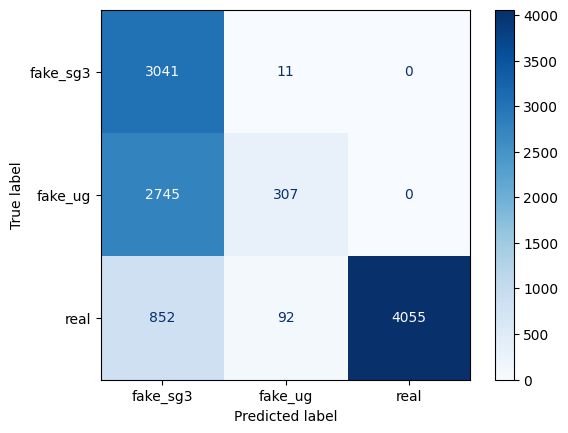

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(Y_real, Y_pred)
cm = confusion_matrix(Y_real, Y_pred, labels=class_names)
print(cm)

# Visualizza la matrice di confusione
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()